# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

## Submitted By: Ninad Ghike

---
## Step 0: Load The Data

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'
validation_file = 'valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

print('Done loading data')

Done loading data


In [7]:
### Replace each question mark with the appropriate value.
import numpy as np
import csv

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: Number of validation examples.
n_valid = len(X_validation)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Load the signnames.csv file
with open('./signnames.csv') as csvfile:
    signnames = csv.reader(csvfile)
    # skip header
    next(signnames, None)

    for signname in signnames:
        print(signname)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['2', 'Speed limit (50km/h)']
['3', 'Speed limit (60km/h)']
['4', 'Speed limit (70km/h)']
['5', 'Speed limit (80km/h)']
['6', 'End of speed limit (80km/h)']
['7', 'Speed limit (100km/h)']
['8', 'Speed limit (120km/h)']
['9', 'No passing']
['10', 'No passing for vehicles over 3.5 metric tons']
['11', 'Right-of-way at the next intersection']
['12', 'Priority road']
['13', 'Yield']
['14', 'Stop']
['15', 'No vehicles']
['16', 'Vehicles over 3.5 metric tons prohibited']
['17', 'No entry']
['18', 'General caution']
['19', 'Dangerous curve to the left']
['20', 'Dangerous curve to the right']
['21', 'Double curve']
['22', 'Bumpy road']
['23', 'Slippery road']
['24', 'Road narrows on the right']
['25', 'Road work']
['26', 'Traffic signals']
['27', 'Pedestrians']
['28', 'Childr

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

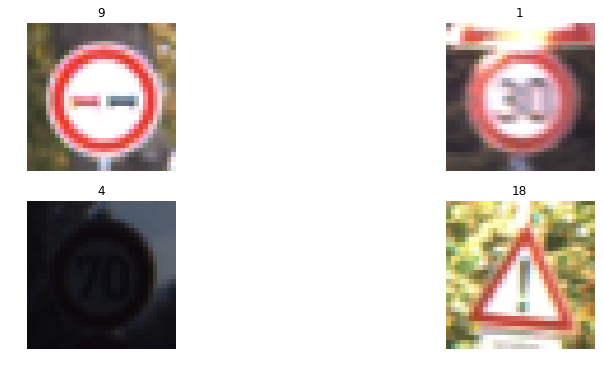

In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,2, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

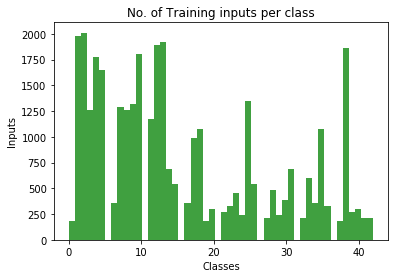

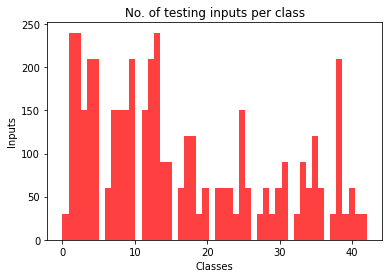

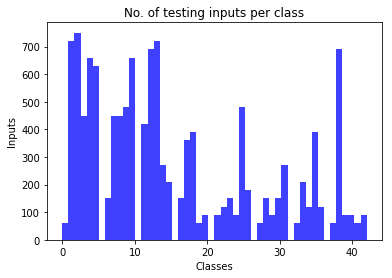

In [9]:
import scipy.ndimage

#set up the plot and show the training data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor = 'green', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of Training inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_validation, 50, facecolor = 'red', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_test, 50, facecolor = 'blue', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

----

## Design and Test a Model Architecture



Preprocessing
Done preprocessing


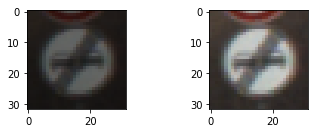

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print('Preprocessing')
from sklearn.utils import shuffle
import cv2


# retain the original data(just in case)
X_train_orig = X_train
X_test_orig = X_test
X_valid_orig = X_validation


# Normalise input (images still in colour)
#X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
#X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
#X_validation = (X_validation - X_validation.mean()) / (np.max(X_validation) - np.min(X_validation))

def pre_pro(image):
    image = image/127.5-1.
    return image

X_train = pre_pro(X_train)
X_test = pre_pro(X_test)
X_validation = pre_pro(X_validation)

def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""
    plt.subplot(2,2,1)
    plt.imshow(X_train_orig[image_index])
    plt.subplot(2,2,2)
    plt.imshow(X_train[image_index])
    
    
plot_norm_image(20)

def preprocess(image):
    img = np.copy(image)
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    img = img/255.-.5
                
print('Done preprocessing')

In [11]:
### SETTING UP TENSOR FLOW
import tensorflow as tf



In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(logits.get_shape().as_list())
    
    return logits

In [13]:
###Setting up features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

**Architecture:**

**Filter dimensions: 5X5.**

**Layer 1: Convolutional. The output shape is 28x28x6. With a RELU activation and Pooling with output shape of 14x14x6.**

**Layer 2: Convolutional. The output shape is 10x10x16. With a RELU activation and Pooling with output shape of 5x5x16.**

**Flattening: The output shape of the final pooling layer was flattened such that it is 1D instead of 3D. The output of this layer is 5*5*16 = 400.**

**Layer 3: Fully Connected. This layer has 120 outputs with a RELU activation.**

**Layer 4: Fully Connected. This layer has 84 outputs with a RELU activation.**

**Layer 5: Fully Connected (Logits). This is the final layer and has 43 outputs.**

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

### TRAINING PIPELINE
rate = 0.001
EPOCHS = 65
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



[None, 43]


In [15]:
###MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
### TRAIN THE MODEL
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.756

EPOCH 2 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.891

EPOCH 4 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.885

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.904

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 12 ...
Validation Accuracy = 0.930

EPOCH 13 ...
Validation Accuracy = 0.919

EPOCH 14 ...
Validation Accuracy = 0.915

EPOCH 15 ...
Validation Accuracy = 0.919

EPOCH 16 ...
Validation Accuracy = 0.904

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.920

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 22 ...
Validation Accuracy = 0.922

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 24 ...
Validation Accura

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.936


---

## Test a Model on New Images


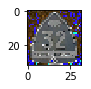

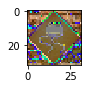

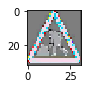

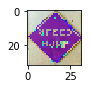

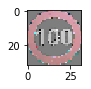

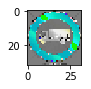

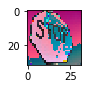

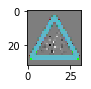

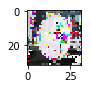

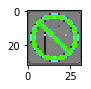

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#images need to be size 32x32x3
#images also need to be scaled between -.5 and .5.
nb_of_images = 10
new_images = np.float32(np.zeros((nb_of_images,32,32,3)))
for i in range(1,nb_of_images+1):
    image = cv2.imread("./test_images/test{}.jpg".format(str(i)))
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = pre_pro(image)
    new_images[i-1] = image
    plt.figure(figsize = (1,1))
    plt.imshow(new_images[i-1]+.5)
    plt.show()

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
new_dict = tf.placeholder(tf.float32, (None, 32, 32, 3))


preds = tf.nn.softmax(LeNet(new_dict))

y_pred = np.zeros((nb_of_images, 1), dtype=np.int32)
y_prob = np.zeros((nb_of_images, 1))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, './lenet')
    print('model restored')
    
    values = sess.run(preds, feed_dict = {new_dict: new_images})
    top_k = sess.run(tf.nn.top_k(values, 5, sorted = True))
    print(top_k)

        
    print('Done predicting with downloaded test images')
    

[None, 43]
Instructions for updating:
Use `tf.global_variables_initializer` instead.
model restored
TopKV2(values=array([[ 0.05651792,  0.04416391,  0.04215441,  0.03696765,  0.03346307],
       [ 0.08234011,  0.06326232,  0.04952065,  0.04293864,  0.0425593 ],
       [ 0.05552747,  0.0457132 ,  0.0443684 ,  0.04126153,  0.03975931],
       [ 0.03482019,  0.03104945,  0.02910714,  0.02877891,  0.02847786],
       [ 0.07956652,  0.04809028,  0.04323892,  0.04305829,  0.0393007 ],
       [ 0.06745179,  0.05728482,  0.05207263,  0.04829156,  0.03927105],
       [ 0.05498097,  0.04696381,  0.04113225,  0.04031533,  0.03526486],
       [ 0.07826789,  0.06009636,  0.04150025,  0.03622747,  0.03494979],
       [ 0.04178358,  0.03936928,  0.0354004 ,  0.03220371,  0.02980752],
       [ 0.05985205,  0.05558669,  0.04953948,  0.04756544,  0.04230726]], dtype=float32), indices=array([[22,  8,  0, 33, 24],
       [22,  3,  8, 40, 33],
       [22, 40,  8, 42,  3],
       [22,  0, 29,  8,  3],
     

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_k_values = top_k[0]
top_k_indices = top_k[1]

ind = np.arange(5)

#for i in range(nb_of_images):
#    plt.figure(i, figsize = (2,2))
#    values = top_k_values[i]
#    plt.bar(ind, values, 0.2)
#    plt.ylabel('Prediction Probs')
#    plt.xlabel('Sign labels')
#    plt.title('Top 5 softmax probablitites for test image {}'.format(str(i+1)))
#    plt.xticks((ind+0.2), tuple(top_k_indices[i]))
    
#plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.